# Project 1: SAT & ACT Analysis


## Problem Statement

ACT has always been a popular choice as compared to SAT for college admissions and scholarships. 
In March 2016, a new format for the SAT was introduced. 

Being part of the team inside the College Board who tracks the statewide participation, we will look through all the data sets gathered and provide recommendation on where money and resources can be spend to help improve the SAT participation rates.


## Executive Summary

### Contents:
- [2017 and 2018 Data Import](#Data-Import)
- [2017 Data Cleaning](#2017-Data-Cleaning)
- [2018 Data Cleaning](#2018-Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
#Imports all libraries used
import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='muted')


## 2017 and 2018 Data Import

#### 1. Read In SAT & ACT  Data

In [2]:
#Read sat_2017.csv & act_2017.csv and converting them to Pandas Dataframe.
sat2017_df = pd.read_csv("../data/sat_2017.csv", index_col=0)    
act2017_df = pd.read_csv("../data/act_2017.csv", index_col=0)

#Read sat_2018.csv & act_2018.csv and converting them to Pandas Dataframe.
#Data source for act_2018 is from http://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf
#and https://magoosh.com/hs/act/2016/average-act-score-by-state/
#Data source for sat_2018.csv is from https://research.collegeboard.org/programs/sat/data/archived/2018-sat-suite-annual-report
sat2018_df = pd.read_csv("../data/sat_2018.csv", index_col=0)    
act2018_df = pd.read_csv("../data/act_2018.csv", index_col=0)

## 2017 Data Cleaning

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Display 1st 10 rows for sat2017 in dataframe format
sat2017_df.head(10)

Participation  Evidence-Based Reading and Writing  Math  \
State                                                                          
Alabama                         5%                                 593   572   
Alaska                         38%                                 547   533   
Arizona                        30%                                 563   553   
Arkansas                        3%                                 614   594   
California                     53%                                 531   524   
Colorado                       11%                                 606   595   
Connecticut                   100%                                 530   512   
Delaware                      100%                                 503   492   
District of Columbia          100%                                 482   468   
Florida                        83%                                 520   497   

                      Total  
State                        
Alabama                1165  
Alaska                 1080  
Arizona                1116  
Arkansas               1208  
California             1055  
Colorado               1201  
Connecticut            1041  
Delaware                996  
District of Columbia    950  
Florida                1017

In [4]:
sat2017_df.shape

(51, 4)

In [5]:
#Display 1st 10 rows for act2017 in dataframe format
act2017_df.head(10)

Participation  English  Math  Reading  Science Composite
State                                                                        
National                       60%     20.3  20.7     21.4     21.0        21
Alabama                       100%     18.9  18.4     19.7     19.4      19.2
Alaska                         65%     18.7  19.8     20.4     19.9      19.8
Arizona                        62%     18.6  19.8     20.1     19.8      19.7
Arkansas                      100%     18.9  19.0     19.7     19.5      19.4
California                     31%     22.5  22.7     23.1     22.2      22.8
Colorado                      100%     20.1  20.3     21.2     20.9      20.8
Connecticut                    31%     25.5  24.6     25.6     24.6      25.2
Delaware                       18%     24.1  23.4     24.8     23.6      24.1
District of Columbia           32%     24.4  23.5     24.9     23.5      24.2

In [6]:
act2017_df.shape

(52, 6)

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

SAT2017 data set:
- There is a total of 51 rows and 4 columns. The 4 columns shows the participation rate of each state, the average score for Evidence-Based Reading and Writing, the average score for Math and lastly the total score. The 51 rows refers to the 51 states in US.

ACT exams:
- There is a total of 52 rows and 6 columns. The 6 columns shows the participation rate of each state, the average score for English, the average score for Math, the average score for Reading, the average score for Science and lastly the Composite scores. The 52 rows altogether . Being having one additional row as compared to the SAT dataset, it shows the national data score.


#### 4a. Does the data look complete? 

In [7]:
sat2017_df.isnull().sum()

Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [8]:
act2017_df.isnull().sum()

Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

Both dataset is complete without any missing values.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

SAT:
- Total score range will be from 400-1600, which is the sum of two test scores. min: 400, max:1600.
- Indiviual test will be from 200-800. min:200, max:800
           
ACT:
- Composite score range will be from from 1-36, which is the average of four test scores. min: 1, max:36. 
- Indiviual test will be from 1-36. min:1, max:36
 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
#Data entry error in the sat_2017.csv
#Maryland, Math
sat2017_df.loc['Maryland','Math'] = 524
sat2017_df.loc['Maryland','Math']

524

In [10]:
#Data entry error in the act_2017.csv and sat_2017.csv
#Maryland, Science
act2017_df.loc['Maryland','Science'] = 23.2
act2017_df.loc['Maryland','Science']

23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [11]:
#Display data type for SAT2017
print('***************SAT data types**************************')
print(sat2017_df.dtypes)
print('')
#Display data type for ACT2017
print('***************ACT data types**************************')
print(act2017_df.dtypes)


***************SAT data types**************************
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

***************ACT data types**************************
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Participation column is an object type for both SAT and ACT data . Most likely is due to the % sign.
        Composite column in ACT is object. It should be float instead.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [12]:
# Get ride of the % in the participation column, then convert it to a int
def convert_type(col):
    
    return int(col.replace("%", ""))

act2017_df['Participation'] = act2017_df['Participation'].apply(convert_type)

- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
sat2017_df['Participation'] = sat2017_df['Participation'].apply(convert_type)

In [14]:
act2017_df.tail(5)

Participation  English  Math  Reading  Science Composite
State                                                                  
Virginia                  29     23.5  23.3     24.6     23.5      23.8
Washington                29     20.9  21.9     22.1     22.0      21.9
West Virginia             69     20.0  19.4     21.2     20.5      20.4
Wisconsin                100     19.7  20.4     20.6     20.9      20.5
Wyoming                  100     19.4  19.8     20.8     20.6     20.2x

In [15]:
act2017_df.loc['Wyoming', 'Composite'] = 20.2
act2017_df.loc['Wyoming', 'Composite']

20.2

In [16]:
act2017_df['Composite'] = act2017_df['Composite'].astype('float')

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [17]:
#Display data type for SAT2017
print('***************SAT data types**************************')
print(sat2017_df.dtypes)
print('')
#Display data type for ACT2017
print('***************ACT data types**************************')
print(act2017_df.dtypes)

***************SAT data types**************************
Participation                         int64
Evidence-Based Reading and Writing    int64
Math                                  int64
Total                                 int64
dtype: object

***************ACT data types**************************
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [18]:
sat2017_df.rename(columns={"Participation": "sat17_part",\
                           "Evidence-Based Reading and Writing": "sat17_rw",\
                           "Math": "sat17_math",\
                           "Total": "sat17_total"}, inplace = True)

act2017_df.rename(columns={"Participation": "act17_part",\
                           "English": "act17_eng",\
                           "Math": "act17_math",\
                           "Reading": "act17_read",\
                           "Science": "act17_sci",\
                           "Composite": "act17_comp"}, inplace = True)

print(sat2017_df.head())
print(act2017_df.head())

            sat17_part  sat17_rw  sat17_math  sat17_total
State                                                    
Alabama              5       593         572         1165
Alaska              38       547         533         1080
Arizona             30       563         553         1116
Arkansas             3       614         594         1208
California          53       531         524         1055
          act17_part  act17_eng  act17_math  act17_read  act17_sci  act17_comp
State                                                                         
National          60       20.3        20.7        21.4       21.0        21.0
Alabama          100       18.9        18.4        19.7       19.4        19.2
Alaska            65       18.7        19.8        20.4       19.9        19.8
Arizona           62       18.6        19.8        20.1       19.8        19.7
Arkansas         100       18.9        19.0        19.7       19.5        19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 



|Feature|Type|Dataset|Description|
|---|---|---|---|
|**sat17_part**|*integer*|SAT|Number of participant taking the 2017 SAT in %|
|**sat17_rw**|*integer*|SAT|Average score for the Reading and Writing section.Ranging from 200-800|
|**sat17_math**|*integer*|SAT|Average score for the Math section.Ranging from 200-800|
|**sat17_total**|*integer*|SAT|Average total score for both sections.Ranging from 400-1600|
|**act17_part**|*integer*|ACT|Number of participant taking the 2017 ACT in %| 
|**act17_eng**|*float*|ACT|Average score for the English section. Ranging from 1-36|
|**act17_math**|*float*|ACT|Average score for the Math section. Ranging from 1-36|
|**act17_read**|*float*|ACT|Average score for the Reading section.Ranging from 1-36|
|**act17_sci**|*float*|ACT|Average score for the Science section. Ranging from 1-36|
|**act17_comp**|*float*|ACT|Average score for all four sections.Ranging from 1-36|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [19]:
#Extra row ("National") in act_2017.csv

act2017_df.drop('National', inplace=True)


In [20]:
act2017_df.head()

act17_part  act17_eng  act17_math  act17_read  act17_sci  \
State                                                                  
Alabama            100       18.9        18.4        19.7       19.4   
Alaska              65       18.7        19.8        20.4       19.9   
Arizona             62       18.6        19.8        20.1       19.8   
Arkansas           100       18.9        19.0        19.7       19.5   
California          31       22.5        22.7        23.1       22.2   

            act17_comp  
State                   
Alabama           19.2  
Alaska            19.8  
Arizona           19.7  
Arkansas          19.4  
California        22.8

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [21]:
# left join
merge_2017 = pd.merge(sat2017_df, act2017_df, on='State', how='left')
merge_2017.head()

sat17_part  sat17_rw  sat17_math  sat17_total  act17_part  \
State                                                                   
Alabama              5       593         572         1165         100   
Alaska              38       547         533         1080          65   
Arizona             30       563         553         1116          62   
Arkansas             3       614         594         1208         100   
California          53       531         524         1055          31   

            act17_eng  act17_math  act17_read  act17_sci  act17_comp  
State                                                                 
Alabama          18.9        18.4        19.7       19.4        19.2  
Alaska           18.7        19.8        20.4       19.9        19.8  
Arizona          18.6        19.8        20.1       19.8        19.7  
Arkansas         18.9        19.0        19.7       19.5        19.4  
California       22.5        22.7        23.1       22.2        22.8

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [22]:
merge_2017.to_csv("../data/combined_2017.csv")

## 2018 Data Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [23]:
#Checking data type
print('***************SAT data types**************************')
print(sat2018_df.dtypes)
print('')
print('***************ACT data types**************************')
print(act2018_df.dtypes)

***************SAT data types**************************
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

***************ACT data types**************************
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


In [24]:
#Fixing data type
sat2018_df['Participation'] = sat2018_df['Participation'].apply(convert_type)

In [25]:
#Checking for missing value 
print(sat2018_df.info())
print(act2018_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4)
memory usage: 2.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Maine
Data columns (total 6 columns):
Participation    51 non-null int64
English          51 non-null float64
Math             51 non-null float64
Reading          51 non-null float64
Science          51 non-null float64
Composite        51 non-null float64
dtypes: float64(5), int64(1)
memory usage: 2.8+ KB
None


In [26]:
#Rename columns.
sat2018_df.rename(columns={"Participation": "sat18_part",\
                           "Evidence-Based Reading and Writing": "sat18_rw",\
                           "Math": "sat18_math",\
                           "Total": "sat18_total"}, inplace = True)

act2018_df.rename(columns={"Participation": "act18_part",\
                           "English": "act18_eng",\
                           "Math": "act18_math",\
                           "Reading": "act18_read",\
                           "Science": "act18_sci",\
                           "Composite": "act18_comp"}, inplace = True)


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [27]:
# left join (sat2018 and act2018)
merge_2018 = pd.merge(sat2018_df, act2018_df, on='State', how='left')

# left join (Combine both 2017 and 2018)
final_df = pd.merge(merge_2017, merge_2018, on='State', how='left')
final_df.to_csv("../data/final.csv")

## Exploratory Data Analysis


### Summary Statistics

Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [28]:
final_df.describe().T.round(2)

count     mean    std    min      25%     50%      75%     max
sat17_part    51.0    39.80  35.28    2.0     4.00    38.0    66.00   100.0
sat17_rw      51.0   569.12  45.67  482.0   533.50   559.0   613.00   644.0
sat17_math    51.0   556.88  47.12  468.0   523.50   548.0   599.00   651.0
sat17_total   51.0  1126.10  92.49  950.0  1055.50  1107.0  1212.00  1295.0
act17_part    51.0    65.25  32.14    8.0    31.00    69.0   100.00   100.0
act17_eng     51.0    20.93   2.35   16.3    19.00    20.7    23.30    25.5
act17_math    51.0    21.18   1.98   18.0    19.40    20.9    23.10    25.3
act17_read    51.0    22.01   2.07   18.1    20.45    21.8    24.15    26.0
act17_sci     51.0    21.45   1.74   18.2    19.95    21.3    23.20    24.9
act17_comp    51.0    21.52   2.02   17.8    19.80    21.4    23.60    25.5
sat18_part    51.0    46.63  38.01    2.0     4.50    52.0    79.50   100.0
sat18_rw      51.0   567.29  45.32  497.0   535.00   552.0   616.50   643.0
sat18_math    51.0   557.25  48.89  480.0   521.50   547.0   600.50   655.0
sat18_total   51.0  1124.65  93.84  977.0  1062.50  1099.0  1220.00  1298.0
act18_part    51.0    61.65  34.08    7.0    28.50    66.0   100.00   100.0
act18_eng     51.0    20.99   2.45   16.6    19.10    20.2    23.70    26.0
act18_math    51.0    21.13   2.04   17.8    19.40    20.7    23.15    25.2
act18_read    51.0    22.02   2.17   18.0    20.45    21.6    24.10    26.1
act18_sci     51.0    21.35   1.87   17.9    19.85    21.1    23.05    24.9
act18_comp    51.0    21.50   2.12   17.7    19.95    21.3    23.65    25.6

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [29]:
#Std deviation for Parameter:
def std_dev(score_list):
    
    score_values = score_list         #A list of values      
    mean = sum(score_values)/len(score_values) 
    standard_dev = (sum((x-mean)**2 for x in score_values) /len(score_values))**0.5
    
    return standard_dev

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [30]:
sd = {col_name: std_dev(final_df[col_name]) for col_name in final_df.columns}
sd

{'sat17_part': 34.92907076664508,
 'sat17_rw': 45.21697020437866,
 'sat17_math': 46.65713364485503,
 'sat17_total': 91.58351056778743,
 'act17_part': 31.824175751231806,
 'act17_eng': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_read': 2.0469029314842646,
 'act17_sci': 1.7222161451443676,
 'act17_comp': 2.000786081581989,
 'sat18_part': 37.63965409204986,
 'sat18_rw': 44.87118561762388,
 'sat18_math': 48.40589946919447,
 'sat18_total': 92.91928260369197,
 'act18_part': 33.745194881997506,
 'act18_eng': 2.4222536143202795,
 'act18_math': 2.015707255555717,
 'act18_read': 2.145891884510421,
 'act18_sci': 1.8516885484833543,
 'act18_comp': 2.0968220768561987}

In [31]:
final_df.describe().round(3)

sat17_part  sat17_rw  sat17_math  sat17_total  act17_part  act17_eng  \
count      51.000    51.000      51.000       51.000      51.000     51.000   
mean       39.804   569.118     556.882     1126.098      65.255     20.931   
std        35.277    45.667      47.121       92.495      32.141      2.354   
min         2.000   482.000     468.000      950.000       8.000     16.300   
25%         4.000   533.500     523.500     1055.500      31.000     19.000   
50%        38.000   559.000     548.000     1107.000      69.000     20.700   
75%        66.000   613.000     599.000     1212.000     100.000     23.300   
max       100.000   644.000     651.000     1295.000     100.000     25.500   

       act17_math  act17_read  act17_sci  act17_comp  sat18_part  sat18_rw  \
count      51.000      51.000     51.000      51.000      51.000    51.000   
mean       21.182      22.014     21.451      21.520      46.627   567.294   
std         1.982       2.067      1.739       2.021      38.014    45.318   
min        18.000      18.100     18.200      17.800       2.000   497.000   
25%        19.400      20.450     19.950      19.800       4.500   535.000   
50%        20.900      21.800     21.300      21.400      52.000   552.000   
75%        23.100      24.150     23.200      23.600      79.500   616.500   
max        25.300      26.000     24.900      25.500     100.000   643.000   

       sat18_math  sat18_total  act18_part  act18_eng  act18_math  act18_read  \
count      51.000       51.000      51.000     51.000      51.000      51.000   
mean      557.255     1124.647      61.647     20.988      21.125      22.016   
std        48.888       93.844      34.081      2.446       2.036       2.167   
min       480.000      977.000       7.000     16.600      17.800      18.000   
25%       521.500     1062.500      28.500     19.100      19.400      20.450   
50%       547.000     1099.000      66.000     20.200      20.700      21.600   
75%       600.500     1220.000     100.000     23.700      23.150      24.100   
max       655.000     1298.000     100.000     26.000      25.200      26.100   

       act18_sci  act18_comp  
count     51.000      51.000  
mean      21.345      21.498  
std        1.870       2.118  
min       17.900      17.700  
25%       19.850      19.950  
50%       21.100      21.300  
75%       23.050      23.650  
max       24.900      25.600

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [32]:
print("Pandas's std: " + str(final_df.describe().loc['std','act17_eng']))
print("Numpy's std: " + str(np.std(final_df['act17_eng'])))
print("Manual compute std: " + str(std_dev(final_df['act17_eng'])))

Pandas's std: 2.35367713980303
Numpy's std: 2.3304876369363363
Manual compute std: 2.3304876369363363


Answer:
The value from the manually calculated standard deviations did not match up with the pandas desecribe. This is due to the fact that Bessel's correction being applied to standard deviations calculation in pandas.
The manually calculated standard deviations matches with the numpy's std method. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

##  Highest and lowest participation rates:

In [33]:
#States having highest participation rates - 2017 SAT
final_df.sort_values('sat17_part', ascending = False)[['sat17_part']].head()

sat17_part
State                           
District of Columbia         100
Michigan                     100
Connecticut                  100
Delaware                     100
New Hampshire                 96

**Highest (2017 SAT):** District of Columbia, Michigan, Connecticut, Delaware

In [34]:
#States having lowest participation rates - 2017 SAT
final_df.sort_values('sat17_part')[['sat17_part']].head()

sat17_part
State                   
North Dakota           2
Mississippi            2
Iowa                   2
Missouri               3
Utah                   3

**Lowest (2017 SAT):** North Dakota, Mississippi, Iowa

In [35]:
#States having highest participation rates - 2018 SAT
final_df.sort_values('sat18_part', ascending = False)[['sat18_part']].head(6)

sat18_part
State                  
Colorado            100
Connecticut         100
Delaware            100
Michigan            100
Idaho               100
Maine                99

**Highest (2018 SAT):** Colorado, Connecticut, Delaware, Michigan, Idaho

In [36]:
#States having lowest participation rates - 2018 SAT
final_df.sort_values('sat18_part')[['sat18_part']].head()

sat18_part
State                   
North Dakota           2
Wyoming                3
South Dakota           3
Nebraska               3
Wisconsin              3

**Lowest (2018 SAT):** North Dakota	

In [37]:
#States having highest participation rates - 2017 ACT
final_df.sort_values('act17_part', ascending = False)[['act17_part']].head(18)                                                          

act17_part
State                     
Alabama                100
Kentucky               100
Wisconsin              100
Utah                   100
Tennessee              100
South Carolina         100
Oklahoma               100
North Carolina         100
Nevada                 100
Montana                100
Mississippi            100
Minnesota              100
Louisiana              100
Missouri               100
Wyoming                100
Colorado               100
Arkansas               100
North Dakota            98

**Highest (2017 ACT):** Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado, Arkansas

In [38]:
#States having lowest participation rates - 2017 ACT
final_df.sort_values('act17_part')[['act17_part']].head()

act17_part
State                    
Maine                   8
New Hampshire          18
Delaware               18
Rhode Island           21
Pennsylvania           23

**Lowest (2017 ACT):** Maine

In [39]:
#States having highest participation rates - 2018 ACT
final_df.sort_values('act18_part', ascending = False)[['act18_part']].head(18)

act18_part
State                     
Alabama                100
Kentucky               100
Wisconsin              100
Utah                   100
Tennessee              100
South Carolina         100
Oklahoma               100
Ohio                   100
North Carolina         100
Nevada                 100
Nebraska               100
Montana                100
Mississippi            100
Louisiana              100
Missouri               100
Wyoming                100
Arkansas               100
Minnesota               99

**Highest (2018 ACT):** Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming, Arkansas

In [40]:
#States having lowest participation rates - 2018 ACT
final_df.sort_values('act18_part')[['act18_part']].head()

act18_part
State                    
Maine                   7
Rhode Island           15
New Hampshire          16
Delaware               17
Pennsylvania           20

**Lowest (2018 ACT):** Maine

##  Highest and lowest participation total / composite scores:

In [41]:
#States having highest total scores - 2017 SAT
final_df.sort_values('sat17_total', ascending = False)[['sat17_total']].head()

sat17_total
State                 
Minnesota         1295
Wisconsin         1291
Iowa              1275
Missouri          1271
Kansas            1260

**Highest (2017 SAT):** Minnesota

In [42]:
#States having lowest total scores - 2017 SAT
final_df.sort_values('sat17_total')[['sat17_total']].head()

sat17_total
State                            
District of Columbia          950
Delaware                      996
Idaho                        1005
Michigan                     1005
Maine                        1012

**Lowest (2017 SAT):** District of Columbia

In [43]:
#States having highest total scores - 2018 SAT
final_df.sort_values('sat18_total', ascending = False)[['sat18_total']].head()

sat18_total
State                    
Minnesota            1298
Wisconsin            1294
North Dakota         1283
Iowa                 1265
Kansas               1265

**Highest (2018 SAT):** Minnesota

In [44]:
#States having lowest total scores - 2018 SAT
final_df.sort_values('sat18_total')[['sat18_total']].head()

sat18_total
State                            
District of Columbia          977
Delaware                      998
West Virginia                 999
Idaho                        1001
Michigan                     1011

**Lowest (2018 ACT):** District of Columbia

In [45]:
#States having highest composite scores - 2017 ACT
final_df.sort_values('act17_comp', ascending = False)[['act17_comp']].head()

act17_comp
State                           
New Hampshire               25.5
Massachusetts               25.4
Connecticut                 25.2
Maine                       24.3
District of Columbia        24.2

**Highest (2017 ACT):** New Hampshire

In [46]:
#States having lowest composite scores - 2017 ACT
final_df.sort_values('act17_comp')[['act17_comp']].head()

act17_comp
State                     
Nevada                17.8
Mississippi           18.6
South Carolina        18.7
Hawaii                19.0
North Carolina        19.1

**Lowest (2017 ACT):** Nevada

In [47]:
#States having highest composite scores - 2018 ACT
final_df.sort_values('act18_comp', ascending = False)[['act18_comp']].head()

act18_comp
State                    
Connecticut          25.6
Massachusetts        25.5
New Hampshire        25.1
New York             24.5
Michigan             24.4

**Highest (2018 ACT):** Connecticut

In [48]:
#States having lowest composite scores - 2018 ACT
final_df.sort_values('act18_comp')[['act18_comp']].head()

act18_comp
State                     
Nevada                17.7
South Carolina        18.3
Mississippi           18.6
Hawaii                18.9
Alabama               19.1

**Lowest (2018 ACT):** Nevada

In [49]:
final_df[['sat17_part','sat18_part']].sort_values("sat18_part", ascending=False).head(15)

sat17_part  sat18_part
State                                       
Colorado                      11         100
Connecticut                  100         100
Delaware                     100         100
Michigan                     100         100
Idaho                         93         100
Maine                         95          99
Illinois                       9          99
Rhode Island                  71          97
Florida                       83          97
New Hampshire                 96          96
District of Columbia         100          92
New Jersey                    70          82
Massachusetts                 76          80
New York                      67          79
Maryland                      69          76

Connecticut, Delaware, Michigan	maintain a 100% participation rate on both years for the SAT.
Interestingly, Colorado has the highest increase rate from 11% to 100%. 
Illinois also has a significant increase in participation rate from 9% to 99%. 
Will take a look at what caused the increase in participation rate for both the Colorado and Illinois.

In [50]:
final_df[['act17_part','act18_part']].sort_values("act18_part", ascending=False).head(18)

act17_part  act18_part
State                                 
Alabama                100         100
Kentucky               100         100
Wisconsin              100         100
Utah                   100         100
Tennessee              100         100
South Carolina         100         100
Oklahoma               100         100
Ohio                    75         100
North Carolina         100         100
Nevada                 100         100
Nebraska                84         100
Montana                100         100
Mississippi            100         100
Louisiana              100         100
Missouri               100         100
Wyoming                100         100
Arkansas               100         100
Minnesota              100          99

Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Montana, Mississippi, Louisiana, Missouri, Wyoming and Arkansas maintain 100% participation rate for both years. There are two states having an increase in participation rate which is Ohio and Nebraska. 

In [51]:
final_df[['sat18_part','act18_part','sat17_part','act17_part']].sort_values("sat18_part", ascending=False)

sat18_part  act18_part  sat17_part  act17_part
State                                                               
Colorado                     100          30          11         100
Connecticut                  100          26         100          31
Delaware                     100          17         100          18
Michigan                     100          22         100          29
Idaho                        100          36          93          38
Maine                         99           7          95           8
Illinois                      99          43           9          93
Rhode Island                  97          15          71          21
Florida                       97          66          83          73
New Hampshire                 96          16          96          18
District of Columbia          92          32         100          32
New Jersey                    82          31          70          34
Massachusetts                 80          25          76          29
New York                      79          27          67          31
Maryland                      76          31          69          28
Pennsylvania                  70          20          65          23
Georgia                       70          53          61          55
Washington                    69          24          64          29
Virginia                      68          24          65          29
Indiana                       67          32          63          35
Texas                         66          41          62          45
Vermont                       64          24          60          29
California                    60          27          53          31
Hawaii                        56          89          55          90
South Carolina                55         100          50         100
North Carolina                52         100          49         100
Oregon                        48          42          43          40
Alaska                        43          33          38          65
Arizona                       29          66          30          62
West Virginia                 28          65          14          69
Nevada                        23         100          26         100
Ohio                          18         100          12          75
New Mexico                    16          67          11          66
Montana                       10         100          10         100
Oklahoma                       8         100           7         100
Tennessee                      6         100           5         100
Alabama                        6         100           5         100
Arkansas                       5         100           3         100
Utah                           4         100           3         100
Missouri                       4         100           3         100
Minnesota                      4          99           3         100
Louisiana                      4         100           4         100
Kentucky                       4         100           4         100
Kansas                         4          71           4          73
South Dakota                   3          77           3          80
Nebraska                       3         100           3          84
Mississippi                    3         100           2         100
Iowa                           3          68           2          67
Wisconsin                      3         100           3         100
Wyoming                        3         100           3         100
North Dakota                   2          98           2          98

In [52]:
final_df[(final_df['act17_part']> 50) & (final_df['sat17_part']>50)].sort_values('sat17_part', ascending=False)[['sat17_part', 'act17_part']].head()

sat17_part  act17_part
State                          
Florida          83          73
Georgia          61          55
Hawaii           55          90

In [53]:
final_df[(final_df['act18_part']> 50) & (final_df['sat18_part']>50)].sort_values('sat18_part', ascending=False)[['sat18_part', 'act18_part']].head()

sat18_part  act18_part
State                                 
Florida                 97          66
Georgia                 70          53
Hawaii                  56          89
South Carolina          55         100
North Carolina          52         100

In year 2018, there are more states having >50% participation rate as compared to year 2017. States like North Carolina, South Carolina and Hawaii have participation rate greater than 50% on both test even though only ACT is required in these 3 states.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [55]:
#Setting up the style
plt.style.use('fivethirtyeight')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 14

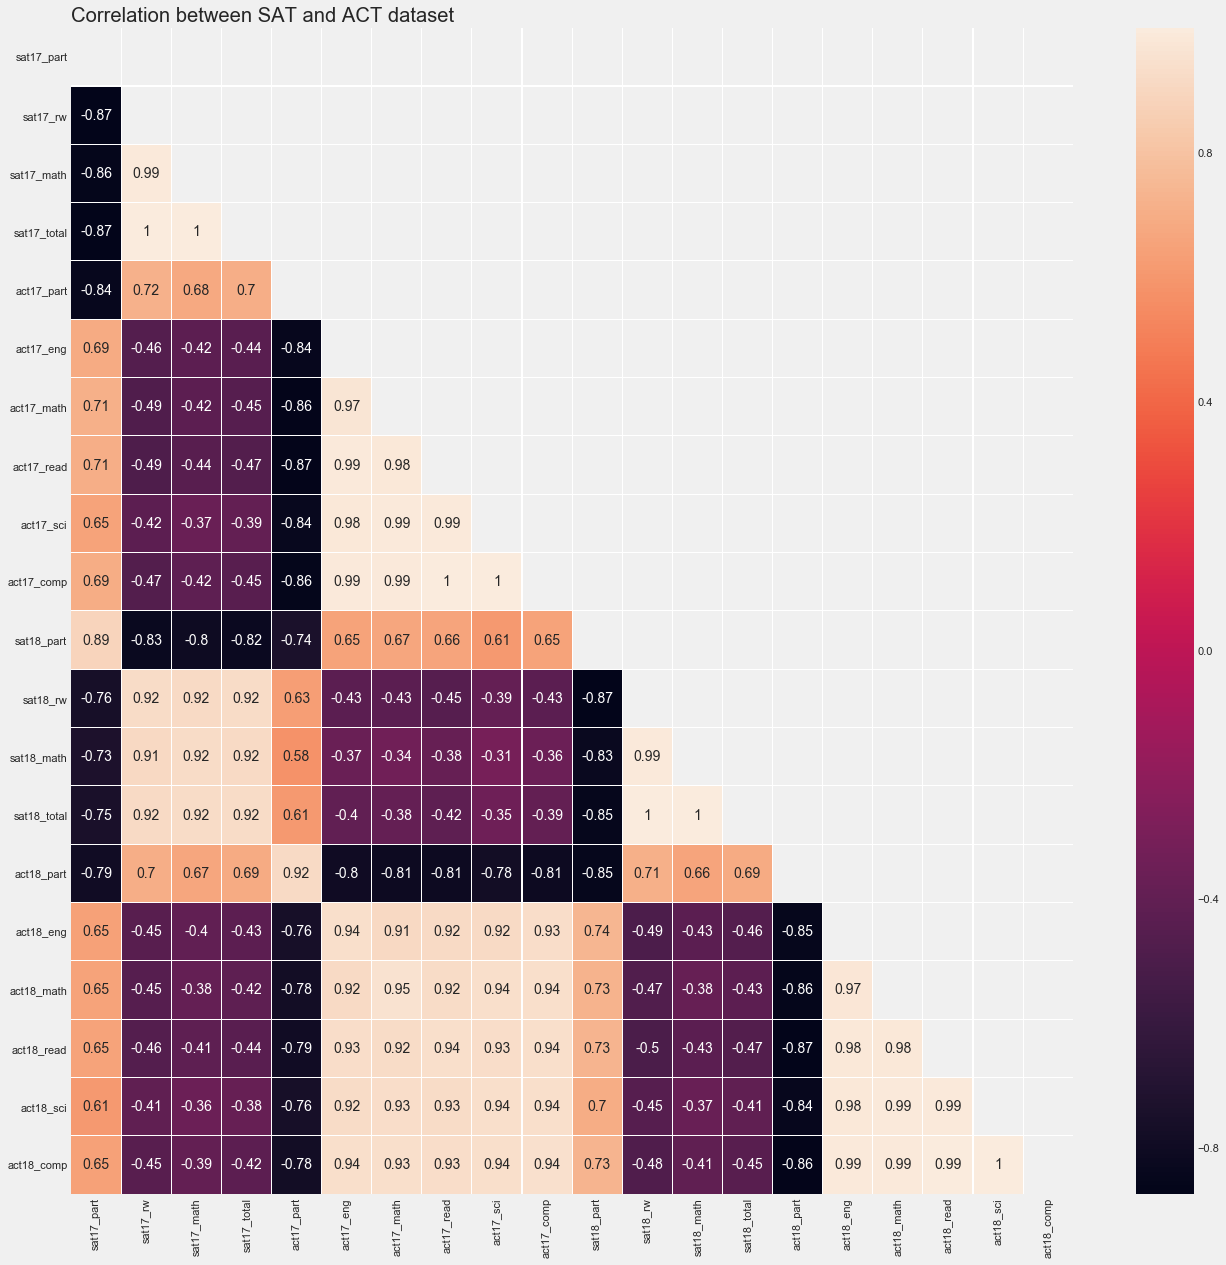

In [56]:
plt.title("Correlation between SAT and ACT dataset", loc='left')

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(final_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(final_df.corr(), mask=mask, linewidths=.1, annot=True)

There are high correlation between act17 and act18 scores.
There are also high correlation between sat17 and sat18 scores.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [57]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,10)) # You'll want to specify your figsize
    ax = ax.ravel()                              # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])            # feel free to add more settings
        ax[i].set_title(list_of_titles[i])       # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i]) 
        ax[i].set_ylabel(list_of_ylabels[i])  
        
        #avline adds a dotted line at the median for each distribution
        #avline adds a line at the mean for each distribution
        #ax[i].axvline(dataframe[column].mean(), color='green', linewidth=2)
        #ax[i].axvline(dataframe[column].median(), color='red', linewidth=2, linestyle='-')


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

## Histograms Plot (SAT & ACT)

### 1) Participation rates

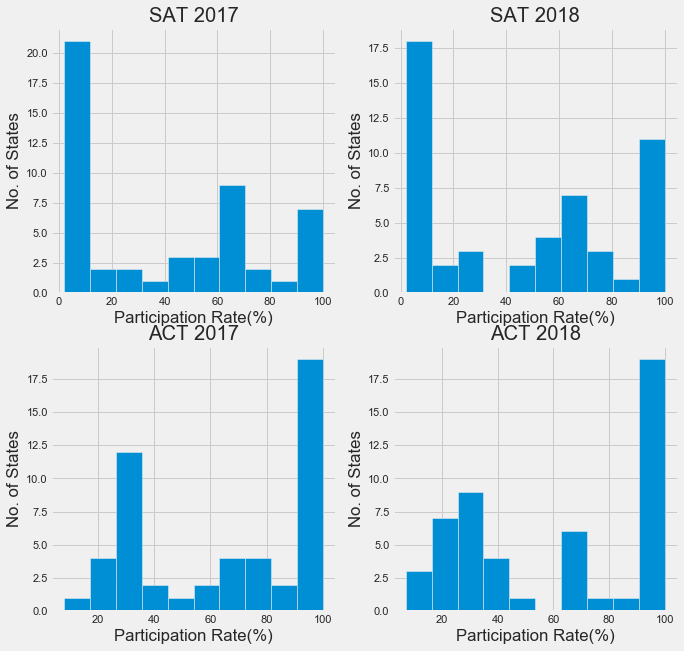

In [58]:
list_of_columns = ['sat17_part', 'sat18_part','act17_part', 'act18_part']
list_of_titles = ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018']
list_of_xlabels = ['Participation Rate(%)', 'Participation Rate(%)', 'Participation Rate(%)', 'Participation Rate(%)']
list_of_ylabels = ['No. of States','No. of States', 'No. of States', 'No. of States']
dataframe = final_df

subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels)

The histogram above compares the participation rates for both the ACT and SAT in 2017/2018. 

When participation rate between 0% to 10% is at the highest for the SAT , the ACT would have a low participation rate. Similarly, when the participation rate between 90 to 100% is at the highest for the ACT, the SAT would have a low participation rate. States having 50% participation rate for both tests is low.

### 2) Math scores

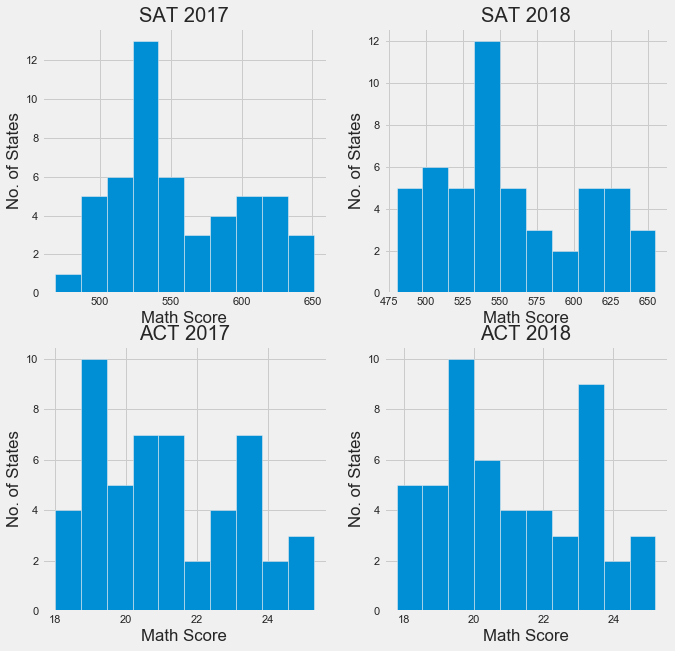

In [59]:
list_of_columns = ['sat17_math', 'sat18_math','act17_math', 'act18_math']
list_of_titles = ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018']
list_of_xlabels = ['Math Score', 'Math Score', 'Math Score', 'Math Score']
list_of_ylabels = ['No. of States', 'No. of States', 'No. of States', 'No. of States']
dataframe = final_df

subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels)

### 3) Reading/verbal scores

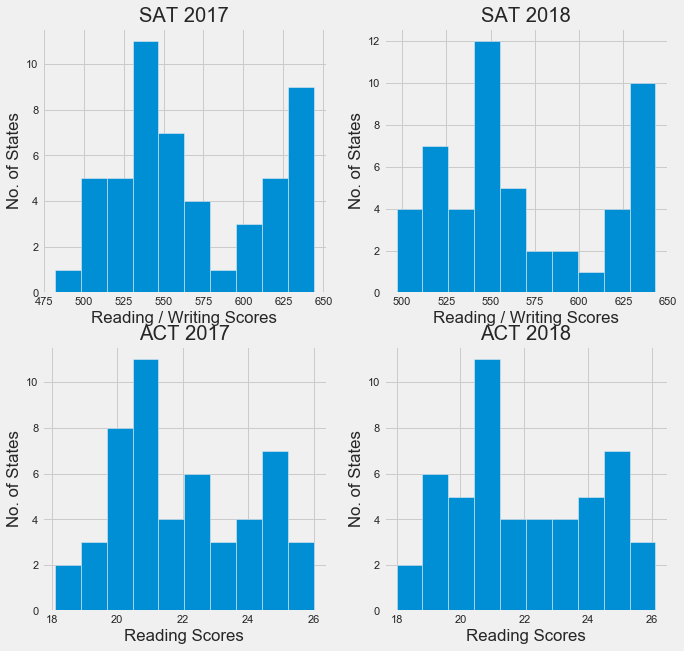

In [60]:
list_of_columns = ['sat17_rw', 'sat18_rw','act17_read', 'act18_read']
list_of_titles = ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018']
list_of_xlabels = ['Reading / Writing Scores', 'Reading / Writing Scores', 'Reading Scores', 'Reading Scores']
list_of_ylabels = ['No. of States', 'No. of States', 'No. of States', 'No. of States']
dataframe = final_df

subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels)

Histogram for subjects Maths and Reading did not shows a normal distribution for both the SAT and ACT 2017/2018.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


## Scatter Plot

### 1) SAT vs. ACT math scores for 2017

Text(0, 0.5, 'ACT')

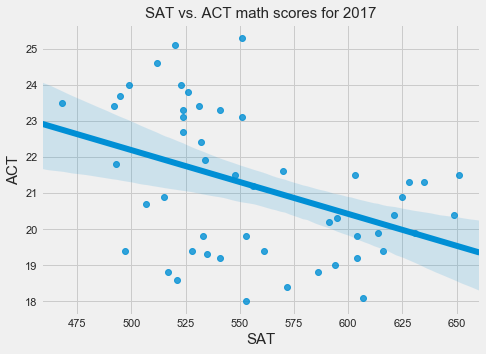

In [61]:
# Scatter plot of SAT vs. ACT math scores for 2017.
fix, ax = plt.subplots(figsize=(7,5))
sns.regplot(final_df['sat17_math'], final_df['act17_math'])

plt.title("SAT vs. ACT math scores for 2017", fontsize = 15)
plt.xlabel("SAT", fontsize = 15)
plt.ylabel("ACT", fontsize = 15)


**Observation: There is no correlation between the SAT 2017 math score and ACT 2017 math score.**


### 2) SAT vs. ACT Reading/Verbal scores for 2017

Text(0, 0.5, 'ACT')

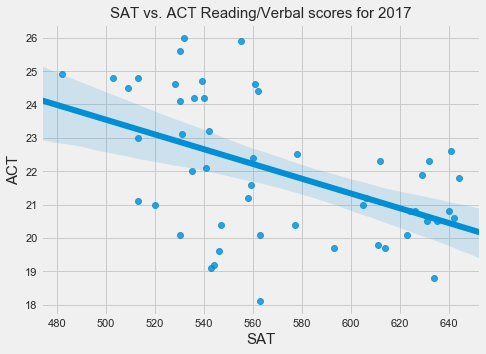

In [62]:
# Scatter plot of SAT vs. ACT verbal/reading scores for 2017.
fix, ax = plt.subplots(figsize=(7,5))
sns.regplot(final_df['sat17_rw'], final_df['act17_read'])

plt.title("SAT vs. ACT Reading/Verbal scores for 2017", fontsize = 15)
plt.xlabel("SAT", fontsize = 15)
plt.ylabel("ACT", fontsize = 15)

**Observation: There is no correlation between the SAT 2017 reading/writing score and ACT 2017 reading score.**


### 3) SAT vs. ACT total/composite scores for 2017

Text(0, 0.5, 'ACT')

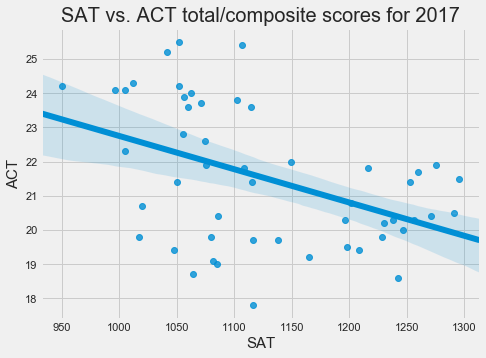

In [63]:
# Scatter plot of SAT vs. ACT total/composite scores for 2017.
fix, ax = plt.subplots(figsize=(7,5))
sns.regplot(final_df['sat17_total'], final_df['act17_comp'])

plt.title("SAT vs. ACT total/composite scores for 2017", fontsize = 20)
plt.xlabel("SAT", fontsize = 15)
plt.ylabel("ACT", fontsize = 15)

**Observation: There is no correlation between the SAT 2017 total score and ACT 2017 composite score.**


### 4) Total scores for SAT 2017 vs. 2018

Text(0, 0.5, 'SAT2018')

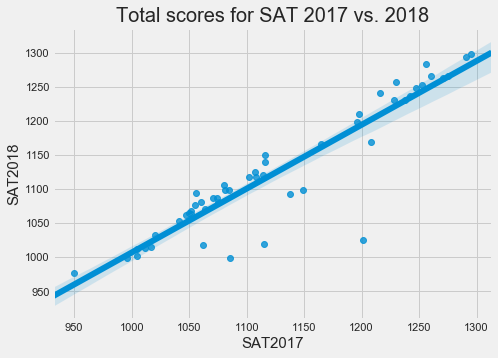

In [64]:
#Scatter plot of Total scores for SAT 2017 vs. 2018
fix, ax = plt.subplots(figsize=(7,5))
sns.regplot(final_df['sat17_total'], final_df['sat18_total'])

plt.title("Total scores for SAT 2017 vs. 2018", fontsize = 20)
plt.xlabel("SAT2017", fontsize = 15)
plt.ylabel("SAT2018", fontsize = 15)

**Observation: There is a positive correlation between the SAT 2017 and SAT 2018 total score.**

### 5) Composite scores for ACT 2017 vs. 2018

Text(0, 0.5, 'ACT2018')

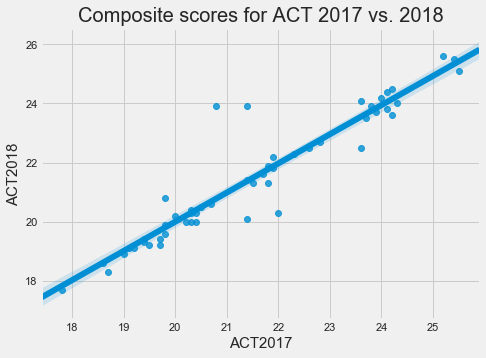

In [65]:
#Scatter plot of Composite scores for ACT 2017 vs. 2018
fix, ax = plt.subplots(figsize=(7,5))
sns.regplot(final_df['act17_comp'], final_df['act18_comp'])

plt.title("Composite scores for ACT 2017 vs. 2018", fontsize = 20)
plt.xlabel("ACT2017", fontsize = 15)
plt.ylabel("ACT2018", fontsize = 15)

**Observation: There is a positive correlation between the ACT 2017 and ACT 2018 total score.**

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0, 0.5, 'Score')

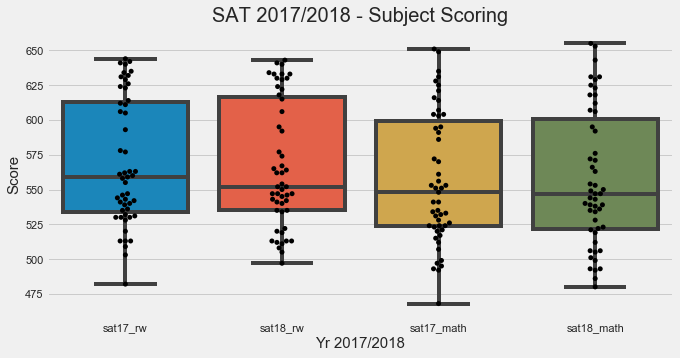

In [66]:
fix, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=final_df[['sat17_rw','sat18_rw','sat17_math','sat18_math']])
sns.swarmplot(data=final_df[['sat17_rw','sat18_rw','sat17_math', 'sat18_math']], color = 'black')
plt.title("SAT 2017/2018 - Subject Scoring", fontsize = 20)
plt.xlabel("Yr 2017/2018", fontsize = 15)
plt.ylabel("Score", fontsize = 15)

Based on the boxplot, the median score for both subjects Reading/Writing and Maths over the two years has a slight drop.

Text(0, 0.5, 'Scores')

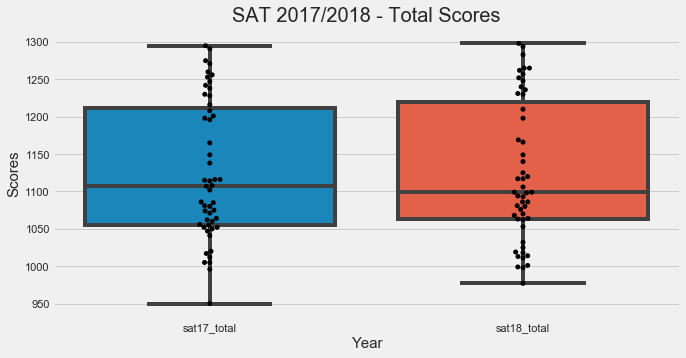

In [67]:
fix, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=final_df[['sat17_total', 'sat18_total']])
sns.swarmplot(data=final_df[['sat17_total', 'sat18_total']],color = 'black')
plt.title("SAT 2017/2018 - Total Scores", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Scores", fontsize = 15)

Text(0, 0.5, 'Scores')

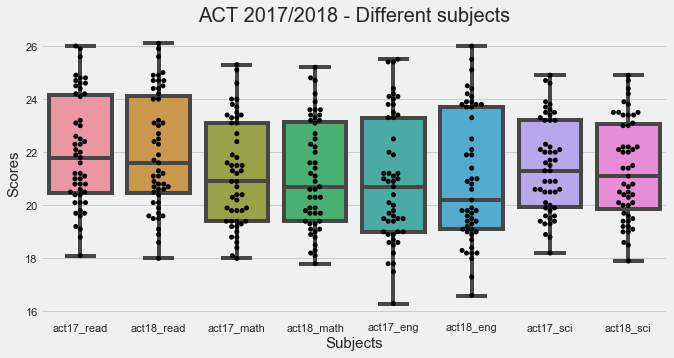

In [69]:
fix, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=final_df[['act17_read','act18_read','act17_math','act18_math','act17_eng','act18_eng','act17_sci','act18_sci']])
sns.swarmplot(data=final_df[['act17_read','act18_read','act17_math','act18_math','act17_eng','act18_eng','act17_sci','act18_sci']],color = 'black')
plt.title("ACT 2017/2018 - Different subjects", fontsize = 20)
plt.xlabel("Subjects", fontsize = 15)
plt.ylabel("Scores", fontsize = 15)

Based on the boxplot, there is a drop in median for all the 4 subjects over two years. The worst drop would be the English subject.

Text(0, 0.5, 'Scores')

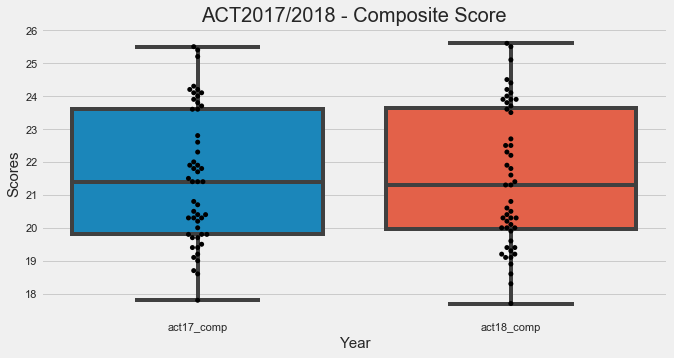

In [70]:
fix, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=final_df[['act17_comp', 'act18_comp']])
sns.swarmplot(data=final_df[['act17_comp', 'act18_comp']], color = 'black')
plt.title("ACT2017/2018 - Composite Score", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Scores", fontsize = 15)

Text(0, 0.5, 'Participation Rate')

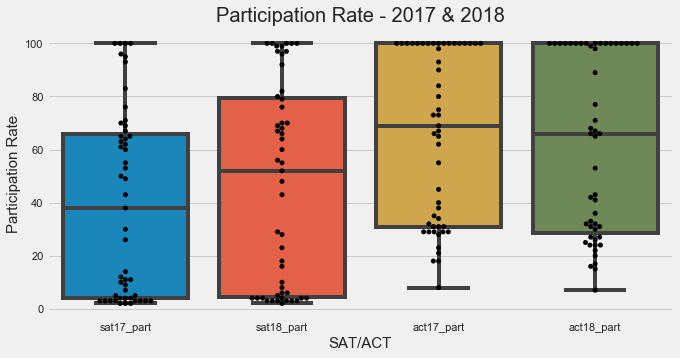

In [71]:
fix, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=final_df[['sat17_part', 'sat18_part', 'act17_part', 'act18_part']])
sns.swarmplot(data=final_df[['sat17_part', 'sat18_part', 'act17_part', 'act18_part']], color = 'black')
plt.title("Participation Rate - 2017 & 2018", fontsize = 20)
plt.xlabel("SAT/ACT", fontsize = 15)
plt.ylabel("Participation Rate", fontsize = 15)

There is a huge increase in median in the participation rate for the SAT from 2017 to 2018.
Whereas, there is a slight drop in median in the participation rate for ACT from 2017 to 2018.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [72]:
final_df.describe().round(2)

sat17_part  sat17_rw  sat17_math  sat17_total  act17_part  act17_eng  \
count       51.00     51.00       51.00        51.00       51.00      51.00   
mean        39.80    569.12      556.88      1126.10       65.25      20.93   
std         35.28     45.67       47.12        92.49       32.14       2.35   
min          2.00    482.00      468.00       950.00        8.00      16.30   
25%          4.00    533.50      523.50      1055.50       31.00      19.00   
50%         38.00    559.00      548.00      1107.00       69.00      20.70   
75%         66.00    613.00      599.00      1212.00      100.00      23.30   
max        100.00    644.00      651.00      1295.00      100.00      25.50   

       act17_math  act17_read  act17_sci  act17_comp  sat18_part  sat18_rw  \
count       51.00       51.00      51.00       51.00       51.00     51.00   
mean        21.18       22.01      21.45       21.52       46.63    567.29   
std          1.98        2.07       1.74        2.02       38.01     45.32   
min         18.00       18.10      18.20       17.80        2.00    497.00   
25%         19.40       20.45      19.95       19.80        4.50    535.00   
50%         20.90       21.80      21.30       21.40       52.00    552.00   
75%         23.10       24.15      23.20       23.60       79.50    616.50   
max         25.30       26.00      24.90       25.50      100.00    643.00   

       sat18_math  sat18_total  act18_part  act18_eng  act18_math  act18_read  \
count       51.00        51.00       51.00      51.00       51.00       51.00   
mean       557.25      1124.65       61.65      20.99       21.13       22.02   
std         48.89        93.84       34.08       2.45        2.04        2.17   
min        480.00       977.00        7.00      16.60       17.80       18.00   
25%        521.50      1062.50       28.50      19.10       19.40       20.45   
50%        547.00      1099.00       66.00      20.20       20.70       21.60   
75%        600.50      1220.00      100.00      23.70       23.15       24.10   
max        655.00      1298.00      100.00      26.00       25.20       26.10   

       act18_sci  act18_comp  
count      51.00       51.00  
mean       21.35       21.50  
std         1.87        2.12  
min        17.90       17.70  
25%        19.85       19.95  
50%        21.10       21.30  
75%        23.05       23.65  
max        24.90       25.60

##### sat17_part:
- This refers to the SAT 2017 partipcate rate across the 51 states.
- It has a mean value of 39.80 with standard deviation of 35.28.
- The IQR is 62%.
- A right skew distribution (median < Mean)

##### sat17_rw:
- This refers to the SAT 2017 score subject for Evidence-Based Reading and Writing across the 51 states.
- It has a mean value of 569.12 with standard deviation of 45.67.
- The IQR is 80.
- A right skew distribution (median < Mean)

##### sat17_math:  
- This refers to the SAT 2017 score subject for Math across the 51 states.
- It has a mean value of 556.88 with standard deviation of 47.12.
- The IQR is 75.5.
- A right skew distribution (median < Mean)

##### sat17_total:
- This refers to the SAT 2017 total score across the 51 states.
- It has a mean value of 1126.10 with standard deviation of 92.49.
- The IQR is 156.5. 
- A right skew distribution (median < Mean)

##### act17_part:
- This refers to the ACT 2017 partipcate rate across the 51 states.
- It has a mean value of 65.25 with standard deviation of 32.14.
- The IQR is 69%.
-  A left skew distribution (median > Mean)

##### act17_eng:
- This refers to the ACT 2017 score subject for English across the 51 states.
- It has a mean value of 20.93 with standard deviation of 2.35.
- The IQR is 4.3. 
- A right skew distribution (median < Mean)

##### act17_math: 
- This refers to the ACT 2017 score subject for Math across the 51 states.
- It has a mean value of 21.18 with standard deviation of 1.98.
- The IQR is 3.7. 
- A right skew distribution (median < Mean)

##### act17_read: 
- This refers to the ACT 2017 score subject for Reading across the 51 states.
- It has a mean value of 22.01 with standard deviation of 2.07.
- The IQR is 3.7. 
- A right skew distribution (median < Mean)

##### act17_sci:
- This refers to the ACT 2017 score subject for Science across the 51 states.
- It has a mean value of 21.45 with standard deviation of 1.74.
- The IQR is 3.25.
- A right skew distribution (median < Mean)

##### act17_comp:
- This refers to the ACT 2017 composite score across the 51 states.
- It has a mean value of 21.52 with standard deviation of 2.02.
- The IQR is 3.8. 
- A right skew distribution (median < Mean)


##### sat18_part:
- This refers to the SAT 2018 partipcate rate across the 51 states.
- It has a mean value of 46.63 with standard deviation of 38.01.
- The IQR is 75%. 
- A left skew distribution (median > Mean)

##### sat18_rw:
- This refers to the SAT 2018 score subject for Evidence-Based Reading and Writing across the 51 states.
- It has a mean value of 567.29 with standard deviation of 45.32.
- The IQR is 81.5.
- A right skew distribution (median < Mean)

##### sat18_math:  
- This refers to the SAT 2018 score subject for Math across the 51 states.
- It has a mean value of 557.25 with standard deviation of 48.89.
- The IQR is 79.
- A right skew distribution (median < Mean)

##### sat18_total:
- This refers to the SAT 2018 total score across the 51 states.
- It has a mean value of 1124.65 with standard deviation of 93.84.
- The IQR is 157.5.
- A right skew distribution (median < Mean)

##### act18_part:
- This refers to the ACT 2018 partipcate rate across the 51 states.
- It has a mean value of 61.65 with standard deviation of 34.08.
- The IQR is 71.5%.
- A left skew distribution (median > Mean)

##### act18_eng:
- This refers to the ACT 2018 score subject for English across the 51 states.
- It has a mean value of 20.99 with standard deviation of 2.45.
- The IQR is 4.6. 
- A right skew distribution (median < Mean)

##### act18_math: 
- This refers to the ACT 2018 score subject for Math across the 51 states.
- It has a mean value of 21.13 with standard deviation of 2.04.
- The IQR is 3.75.
- A right skew distribution (median < Mean)

##### act18_read: 
- This refers to the ACT 2018 score subject for Reading across the 51 states.
- It has a mean value of 22.02 with standard deviation of 2.17.
- The IQR is 3.65. 
- A right skew distribution (median < Mean)

##### act18_sci:
- This refers to the ACT 2018 score subject for Science across the 51 states.
- It has a mean value of 21.35 with standard deviation of 1.87.
- The IQR is 3.2. 
- A right skew distribution (median < Mean)

##### act18_comp:
- This refers to the ACT 2018 composite score across the 51 states.
- It has a mean value of 21.50 with standard deviation of 2.12.
- The IQR is 3.7. 
- A right skew distribution (median < Mean)


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:No. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

In [73]:
skewness1 = final_df['sat18_math'].median() - final_df['sat18_math'].mean()
print("Math distribution Skewness:" + str(skewness1))

skewness2 = final_df['sat18_rw'].median() - final_df['sat18_rw'].mean()
print("Reading & Writing distribution Skewness:" + str(skewness2))

skewness3 = final_df['sat18_part'].median() - final_df['sat18_part'].mean()
print("Participation rate distribution Skewness:" + str(skewness3))


Math distribution Skewness:-10.25490196078431
Reading & Writing distribution Skewness:-15.294117647058783
Participation rate distribution Skewness:5.372549019607845


#### Using statistics from SAT 2018

All three statistics did not have normal distribution.

##### Math
- It has a right skew distribution.

##### Reading & writing
- It has a right skew distribution.

##### Participation Rate
- It has a left skew distribution.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Text(0, 0.5, 'ACT2017')

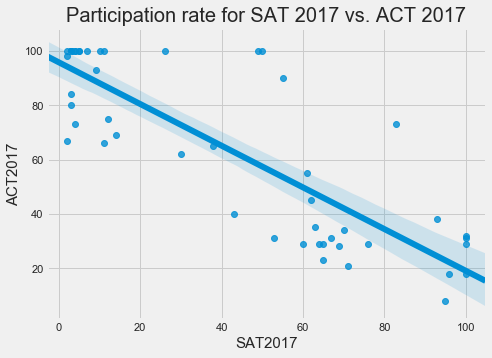

In [74]:
#Scatter plot of Participation rate for SAT 2017 vs. ACT 2017
fix, ax = plt.subplots(figsize=(7,5))
sns.regplot(final_df['sat17_part'], final_df['act17_part'])

plt.title("Participation rate for SAT 2017 vs. ACT 2017", fontsize = 20)
plt.xlabel("SAT2017", fontsize = 15)
plt.ylabel("ACT2017", fontsize = 15)

Answer:

Samples drawn from each states is different since the population for each states and the number of students taking ACT or SAT also defers.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:
No.
The range of score for both the SAT maths and ACT maths are different.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [75]:
t_stat, p_value = stats.ttest_ind(final_df['sat17_part'],final_df['act17_part'], equal_var=False)
print("t_stat:" + str(t_stat))
print("p_value:" + str(p_value))

t_stat:-3.808577890817054
p_value:0.00024238408285306908


Using Two-Sample t-test
H0: mean sat17_part = mean act17_part
HA: mean sat17_part != mean act17_part

alpha = 0.05
The p-value is 0.00024238408285306908 p <alpha. we can reject H0


## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [76]:
final_df[['sat17_part', 'sat18_part']]

sat17_part  sat18_part
State                                       
Alabama                        5           6
Alaska                        38          43
Arizona                       30          29
Arkansas                       3           5
California                    53          60
Colorado                      11         100
Connecticut                  100         100
Delaware                     100         100
District of Columbia         100          92
Florida                       83          97
Georgia                       61          70
Hawaii                        55          56
Idaho                         93         100
Illinois                       9          99
Indiana                       63          67
Iowa                           2           3
Kansas                         4           4
Kentucky                       4           4
Louisiana                      4           4
Maine                         95          99
Maryland                      69          76
Massachusetts                 76          80
Michigan                     100         100
Minnesota                      3           4
Mississippi                    2           3
Missouri                       3           4
Montana                       10          10
Nebraska                       3           3
Nevada                        26          23
New Hampshire                 96          96
New Jersey                    70          82
New Mexico                    11          16
New York                      67          79
North Carolina                49          52
North Dakota                   2           2
Ohio                          12          18
Oklahoma                       7           8
Oregon                        43          48
Pennsylvania                  65          70
Rhode Island                  71          97
South Carolina                50          55
South Dakota                   3           3
Tennessee                      5           6
Texas                         62          66
Utah                           3           4
Vermont                       60          64
Virginia                      65          68
Washington                    64          69
West Virginia                 14          28
Wisconsin                      3           3
Wyoming                        3           3

1)Colorado : Increase of 11% to 100%
"On April 11th, 2017 all Colorado high school juniors will take the SAT." 
(Taken from https://www.testive.com/colorado-sat-change-2017/)
"The state Department of Education announced Wednesday that a selection committee chose The College Board, makers of the SAT, over the ACT testing company, which has been testing juniors in Colorado since 2001" 
(Taken from https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/)
Due to the state policy changes, this explain the big increase for the SAT participation rate from 2017 to 2018.


2)llinois  : Increase from 9% to 99%
"It's official, according to the state: Testing giant ACT is out and the College Board's SAT is in, bringing a new college entrance exam into Illinois public high schools."
(Taken from https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html)
In a fight between two giant standardized test providers, the SAT again has won a multi-million-dollar contract for Illinois’ high-school tests — and the also-ran ACT is filing a protest with the Illinois State Board of Education.
Taken from https://www.chalkbeat.org/posts/chicago/2018/07/27/act-protests-state-boards-embrace-of-rival-test-provider/)
Again is due to the state policy changes, this explain the big increase for the SAT participation rate from 2017 to 2018.


3)Rhode Island : Increase from 71% to 97%
"In 2018, the SATs and PSATs became a graduation requirement, part of the state’s federal education plan." (Taken from https://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores)
"PROVIDENCE, R.I. (AP) — SAT participation is up in Rhode Island after the test became a graduation requirement, but the percentage of students who had proficient scores in reading and math has declined." (Taken from https://www.usnews.com/news/best-states/rhode-island/articles/2018-10-25/sat-participation-increases-scores-decline-in-ri)
For the third case, the increase in participation rate is also due to the state policy changes.



## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Text(0, 0.5, 'Read/Write Score')

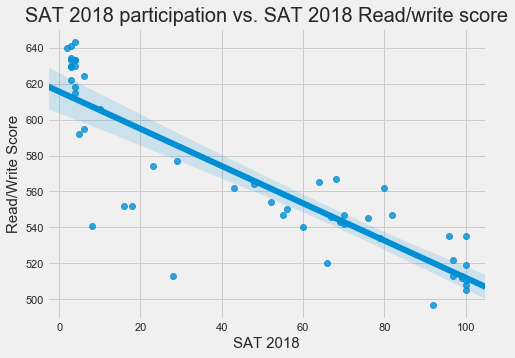

In [77]:
#Scatter plot of SAT 2018 participation vs. SAT 2018 Read/write score
fix, ax = plt.subplots(figsize=(7,5))
sns.regplot(final_df['sat18_part'], final_df['sat18_rw'])

plt.title("SAT 2018 participation vs. SAT 2018 Read/write score", fontsize = 20)
plt.xlabel("SAT 2018", fontsize = 15)
plt.ylabel("Read/Write Score", fontsize = 15)

Text(0, 0.5, 'Math Score')

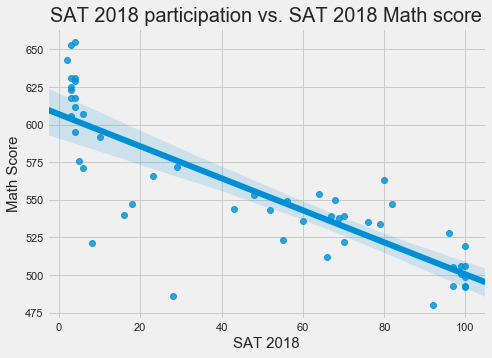

In [78]:
#Scatter plot of SAT 2018 participation vs. SAT 2018 Math score
fix, ax = plt.subplots(figsize=(7,5))
sns.regplot(final_df['sat18_part'], final_df['sat18_math'])

plt.title("SAT 2018 participation vs. SAT 2018 Math score", fontsize = 20)
plt.xlabel("SAT 2018", fontsize = 15)
plt.ylabel("Math Score", fontsize = 15)

In [79]:
final_df[['sat17_part','sat18_part']].sort_values('sat17_part').head(25)

sat17_part  sat18_part
State                                
North Dakota            2           2
Mississippi             2           3
Iowa                    2           3
Missouri                3           4
Utah                    3           4
South Dakota            3           3
Nebraska                3           3
Wisconsin               3           3
Minnesota               3           4
Wyoming                 3           3
Arkansas                3           5
Kansas                  4           4
Kentucky                4           4
Louisiana               4           4
Alabama                 5           6
Tennessee               5           6
Oklahoma                7           8
Illinois                9          99
Montana                10          10
Colorado               11         100
New Mexico             11          16
Ohio                   12          18
West Virginia          14          28
Nevada                 26          23
Arizona                30          29

### Recommendations:

#### State of choice: West Virginia
Based on the 2 scatter plots above, when the SAT participation rate increase, the scores for the subjects decrease.
We do not want high participation rate with students getting poor results.
Therefore, resources need to be spend in helping students to prepare for the SAT exam such as preparing more mock exams before they take the actual papers.

Students in West Virginia is free to choose between SAT or ACT since the state did not mandate any particular exam. 
There is also an 100% increase in partipcation rate from 14% to 28%. This shows that more students are keen to take part in the SAT exams after the major changes made in 2016. Therefore, we can spend more resources in West Virginia to help students to be more prepare for SAT exam or give more subsidies to the exam fee especially for the lower income family.